<a href="https://colab.research.google.com/github/bnespi/Data-Science-Shits/blob/main/Sparta2_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading the dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()

data_df = pd.DataFrame(data.data, columns=data.feature_names)
target_df = pd.DataFrame(data.target).rename(columns={0:'Diagnosis'})

dataset_df = pd.concat([data_df, target_df], axis=1)

dataset_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


###Feature Selection

Map the correlation to see highly correlated features

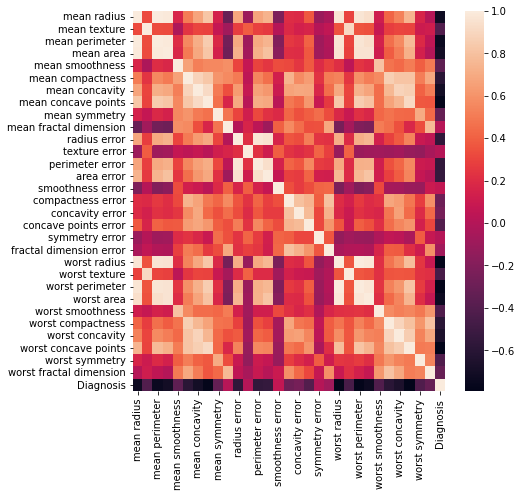

In [3]:
plt.figure(figsize=(7,7));

sns.heatmap(dataset_df.corr());



Filter the correlation to between 0.85 and 0.99

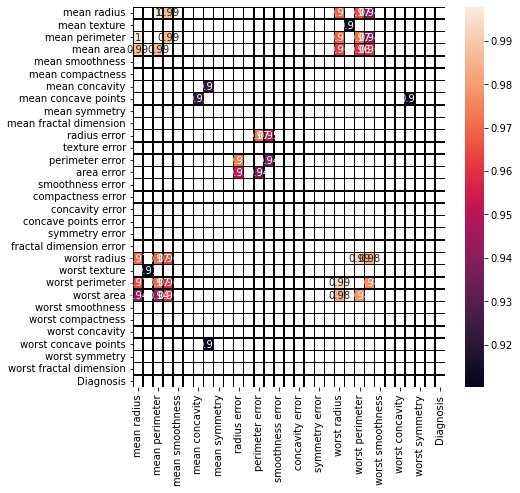

In [5]:
corr = dataset_df.corr()

plt.figure(figsize=(7,7));
sns.heatmap(corr[(corr>0.9) & (corr != 1.0)], linewidths=0.5, linecolor='black', annot=True);

Mean/Worst/Error radius, perimeter, and area are highly correlated. One feature could be chosen to represent the three of them.



In [6]:
features = list(dataset_df.columns)
features = ['mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 
            'texture error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',
            'worst smoothness', 'worst compactness', 'worst concavity',
            'worst symmetry', 'worst fractal dimension']
 
filtered = dataset_df[features]

filtered.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,texture error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


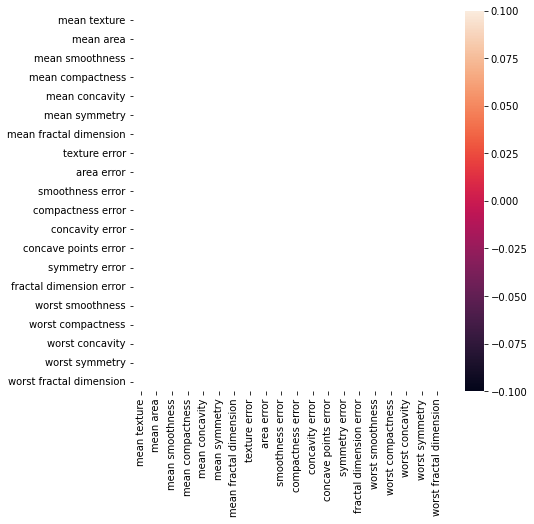

In [7]:
plt.figure(figsize=(7,7));
f_corr=filtered.corr();
sns.heatmap(f_corr[(f_corr>=0.9)&(f_corr<1.0)], linewidths=0.5, annot=True);

###Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

Split the dataset

In [9]:
to_split = pd.concat([filtered, dataset_df[['Diagnosis']]], axis=1)
# y = dataset_df[['Diagnosis']]

train, test = train_test_split(to_split,train_size=0.7, shuffle=True, random_state=0)

train_x = train[features]
train_y = train.Diagnosis

test_x = test[features]
test_y = test.Diagnosis

###GridSearchCV 

####Linear Regression / Linear Regression CV

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

params = dict(solver=solvers, penalty=penalty, C=c_values)
params_cv = dict(solver=solvers, penalty=penalty, Cs=c_values)
grid_search_lr = GridSearchCV(LogisticRegression(), params, scoring='accuracy')
grid_search_lr_cv = GridSearchCV(LogisticRegressionCV(), params_cv, scoring='accuracy');

results_lr = grid_search_lr.fit(test_x, test_y)
results_lr_cv = grid_search_lr_cv.fit(test_x, test_y)

In [52]:
print("Logistic Regression Parameters")
print(results_lr.best_score_)
print(results_lr.best_params_)

Logistic Regression Parameters
0.9473949579831933
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
print("Logistic Regression CV Parameters")
print(results_lr_cv.best_score_)
print(results_lr_cv.best_params_)

Logistic Regression CV Parameters
0.9359663865546219
{'Cs': 100, 'penalty': 'l2', 'solver': 'liblinear'}


####SVC

In [16]:
params = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}#, 'gamma': [1,0.1,0.01,0.001]
grid_search_svc = GridSearchCV(SVC(), params, scoring='accuracy')

results_svc = grid_search_svc.fit(test_x, test_y)

In [20]:
print("SVC Parameters")
print(results_svc.best_score_)
print(results_svc.best_params_)

SVC Parameters
0.9184873949579833
{'C': 1, 'kernel': 'poly'}


Random Forest

In [17]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')

results_rf = grid_search_rf.fit(test_x, test_y)

In [21]:
print("Random Forest Classifier Parameters")
print(results_rf.best_score_)
print(results_rf.best_params_)

Random Forest Classifier Parameters
0.9591596638655462
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}


####Decision Tree

In [ ]:
params={'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_split':range(1,10),'min_samples_leaf':range(1,5)}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy')

results_dt = grid_search_dt.fit(test_x, test_y)

In [22]:
print("Random Forest Classifier Parameters")
print(results_dt.best_score_)
print(results_dt.best_params_)

Random Forest Classifier Parameters
0.9300840336134455
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6}


###Comparing Default and GridSearchCV Results

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
def train_test_scores(train_x, train_y, test_x, test_y, model, model_name):
  print(model_name)
  print("\tTest Set Accuracy:{}".format(100*accuracy_score(test_y, model.predict(test_x))))
  print("\tTraining Set Accuracy:{}".format(100*accuracy_score(train_y, model.predict(train_x))))

In [ ]:
log_reg = LogisticRegression().fit(train_x, train_y)
log_reg_cv = LogisticRegressionCV().fit(train_x, train_y)
svc = SVC().fit(train_x, train_y)
rf = RandomForestClassifier().fit(train_x, train_y)
dec_tree = DecisionTreeClassifier().fit(train_x, train_y)

Default Parameters:

In [14]:
#Logistic Regression Accuracy Score
train_test_scores(train_x, train_y, test_x, test_y, log_reg, 'Logistic Regression')

#Logistic Regression CV Accuracy Score
train_test_scores(train_x, train_y, test_x, test_y, log_reg_cv, 'Logistic Regression CV')

#Support Vector Classifier Accuracy Score
train_test_scores(train_x, train_y, test_x, test_y, svc, 'Support Vector Classifier')

#Random Forest Classifier Accuracy Score
train_test_scores(train_x, train_y, test_x, test_y, rf, 'Random Forest Classifier')

#Decision Tree Classifier Accuracy Score
train_test_scores(train_x, train_y, test_x, test_y, dec_tree, 'Decision Tree Classifier')

Logistic Regression
	Test Set Accuracy:94.15204678362574
	Training Set Accuracy:94.47236180904522
Logistic Regression CV
	Test Set Accuracy:94.15204678362574
	Training Set Accuracy:98.24120603015075
Support Vector Classifier
	Test Set Accuracy:87.71929824561403
	Training Set Accuracy:86.68341708542714
Random Forest Classifier
	Test Set Accuracy:92.98245614035088
	Training Set Accuracy:100.0
Decision Tree Classifier
	Test Set Accuracy:87.13450292397661
	Training Set Accuracy:100.0


From the results, it seems that the models that classify new inputs better are:


*   Logistic Regression;
*   Logistic Regression CV; and
*   Support Vector Classifier

Meanwhile, the Random Forest and Decision Tree Classifiers seem to be overfitting as its training set accuracy is 100% but with a testing set accuracy of less. 

It looks like Logistic Regression CV is almost overfitting and SVC seems to react better to the input (training set).

GridSearchCV "Best" Parameters:

In [26]:
#Logistic Regression Accuracy Score
model1 = LogisticRegression(C= 100, penalty= 'l2', solver= 'liblinear').fit(train_x, train_y)
train_test_scores(train_x, train_y, test_x, test_y, model1, 'Logistic Regression')

#Logistic Regression CV Accuracy Score
model2 = LogisticRegressionCV(Cs= 100, penalty= 'l2', solver= 'liblinear').fit(train_x, train_y)
train_test_scores(train_x, train_y, test_x, test_y, model2, 'Logistic Regression CV')

#Support Vector Classifier Accuracy Score
model3 = SVC(C = 1, kernel = 'poly').fit(train_x, train_y)
train_test_scores(train_x, train_y, test_x, test_y, model3, 'Support Vector Classifier')

#Random Forest Classifier Accuracy Score
model4 = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'auto', n_estimators = 500).fit(train_x, train_y)
train_test_scores(train_x, train_y, test_x, test_y, model4, 'Random Forest Classifier')

#Decision Tree Classifier Accuracy Score
model5 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 4, min_samples_split = 6).fit(train_x, train_y)
train_test_scores(train_x, train_y, test_x, test_y, model5, 'Decision Tree Classifier')

Logistic Regression
	Test Set Accuracy:94.15204678362574
	Training Set Accuracy:97.73869346733667
Logistic Regression CV
	Test Set Accuracy:94.73684210526315
	Training Set Accuracy:98.24120603015075
Support Vector Classifier
	Test Set Accuracy:89.47368421052632
	Training Set Accuracy:87.43718592964824
Random Forest Classifier
	Test Set Accuracy:92.39766081871345
	Training Set Accuracy:99.2462311557789
Decision Tree Classifier
	Test Set Accuracy:87.13450292397661
	Training Set Accuracy:96.73366834170855


*   Logistic Regression increased in training set accuracy
*   Logistic Regression CV test set accuracy increased
*   SVC improved so much
*   Random Forest Classifier and Decision Tree Classifier is overfitting less than before. 

